### **Introducción al Problema: Fashion MNIST**

Antes de empezar, hablemos un poco del dataset **Fashion MNIST**. Piensa en él como el "hola mundo" de la visión por computadora, pero un poco más interesante que el clásico MNIST de dígitos escritos a mano. Contiene 70,000 imágenes en escala de grises (de 28x28 píxeles) de 10 tipos de prendas de vestir. El objetivo es que nuestra red neuronal vea una imagen y nos diga si es una camiseta, un pantalón, un bolso, etc.

Las 10 clases son:

  * 0: T-shirt/top (Camiseta/top)
  * 1: Trouser (Pantalón)
  * 2: Pullover (Suéter)
  * 3: Dress (Vestido)
  * 4: Coat (Abrigo)
  * 5: Sandal (Sandalia)
  * 6: Shirt (Camisa)
  * 7: Sneaker (Zapatilla)
  * 8: Bag (Bolso)
  * 9: Ankle boot (Botín)

-----

### **Paso 0: Preparación del Entorno**

Primero, necesitamos importar las librerías que usaremos.

In [2]:
# Importamos TensorFlow, la librería principal para deep learning de Google.
import tensorflow as tf

# Importamos NumPy para operaciones numéricas eficientes, especialmente con arreglos (arrays).
import numpy as np

# Importamos Matplotlib para crear visualizaciones y gráficos.
import matplotlib.pyplot as plt

# Configuramos matplotlib para que los gráficos se vean un poco mejor.
plt.style.use('seaborn-v0_8-whitegrid')

### **1. Carga y Preprocesamiento de Datos**

En este paso, cargaremos el dataset, lo prepararemos para que la red neuronal pueda "entenderlo" mejor y lo dividiremos en conjuntos de entrenamiento y prueba.

#### **Explicación de la Sección:**

La data "cruda" casi nunca se usa directamente. Necesitamos procesarla.

1.  **Carga de Datos:** TensorFlow nos da acceso directo al dataset Fashion MNIST. Viene convenientemente dividido en un conjunto de **entrenamiento** (para que el modelo aprenda) y un conjunto de **prueba** (para evaluar qué tan bien aprendió con datos que nunca ha visto).
2.  **Normalización:** Las imágenes tienen píxeles con valores de 0 (negro) a 255 (blanco). Para que el entrenamiento sea más rápido y estable, es una práctica estándar escalar estos valores a un rango más pequeño, como de 0 a 1. Lo logramos simplemente dividiendo cada píxel por 255.
3.  **One-Hot Encoding:** Las etiquetas originales son números del 0 al 9. Para problemas de clasificación, especialmente cuando usamos la función de pérdida `categorical_crossentropy`, necesitamos convertir estas etiquetas a un formato llamado "one-hot encoding". Por ejemplo, la etiqueta `5` (Sandalia) se convierte en un arreglo de 10 elementos: `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`. La posición con el '1' indica la clase correcta.

#### **Código:**

In [3]:
# --- Carga del Dataset ---
# Cargamos el dataset Fashion MNIST. TensorFlow se encarga de descargarlo si no lo tienes.
# x_train: imágenes para entrenar el modelo.
# y_train: etiquetas correspondientes a las imágenes de entrenamiento.
# x_test: imágenes para probar el modelo después del entrenamiento.
# y_test: etiquetas para verificar la precisión del modelo en los datos de prueba.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Mostremos las dimensiones de nuestros datos para entenderlos mejor.
print(f"Forma de las imágenes de entrenamiento: {x_train.shape}")
print(f"Forma de las etiquetas de entrenamiento: {y_train.shape}")
print(f"Forma de las imágenes de prueba: {x_test.shape}")
print(f"Forma de las etiquetas de prueba: {y_test.shape}")

# --- Normalización de las imágenes ---
# Los valores de los píxeles van de 0 a 255. Los normalizamos a un rango de 0 a 1.
# Esto ayuda al optimizador a converger más rápido y de forma más estable.
# Lo hacemos para el conjunto de entrenamiento y el de prueba.
x_train = x_train / 255.0
x_test = x_test / 255.0

# --- One-Hot Encoding de las etiquetas ---
# Convertimos las etiquetas (0-9) a un formato one-hot.
# Por ejemplo, si una etiqueta es '3', se convierte en [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
# Esto es necesario para la función de pérdida 'categorical_crossentropy'.
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Mostremos cómo se ve una etiqueta después de la conversión.
print("\nEjemplo de etiqueta original:", np.argmax(y_train[0]))
print("Ejemplo de etiqueta en formato one-hot:", y_train[0])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forma de las imágenes de entrenamiento: (60000, 28, 28)
Forma de las etiquetas de entrenamiento: (60000,)
Forma de las imágenes de prueba: (10000, 28, 28)
Forma de las etiquetas de prueba: (10000,)

Ejemplo de etiqueta original: 9
Ejemplo de etiqueta en formato one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


-----

### **2. Diseño del Modelo**

Aquí construiremos la arquitectura de nuestra red neuronal. Usaremos el modelo `Sequential` de Keras, que es como apilar capas una encima de la otra.

#### **Explicación de la Sección:**

  * **`tf.keras.Sequential`**: Es el contenedor para nuestro modelo. Las capas se añaden en secuencia.
  * **`Flatten` (Capa de Aplanamiento)**: Nuestra primera capa. Las imágenes son matrices de 28x28 píxeles. Esta capa las "aplana" o "desenrolla", convirtiendo cada imagen en un vector largo de 784 píxeles (28 \* 28 = 784). Esto es necesario para poder conectar las imágenes a las capas densas.
  * **`Dense` (Capa Densa)**: Es la capa neuronal "clásica". Cada neurona en una capa densa está conectada a *todas* las neuronas de la capa anterior.
      * **Neuronas (unidades)**: El primer argumento (ej. `128`) es el número de neuronas en la capa. Es un hiperparámetro que podemos ajustar. Más neuronas pueden aprender patrones más complejos, pero también aumentan el riesgo de sobreajuste (*overfitting*).
      * **Función de Activación**: Determina si una neurona debe "activarse" o no.
          * **`relu` (Rectified Linear Unit)**: Es la función más popular. Es muy simple: si la entrada es positiva, la salida es la misma entrada; si es negativa, la salida es cero. Es computacionalmente muy eficiente.
          * **`tanh` (Tangente Hiperbólica)**: Comprime los valores de entrada a un rango entre -1 y 1. Es útil, pero a veces puede sufrir de un problema llamado "desvanecimiento del gradiente".
  * **Capa de Salida (`softmax`)**: La última capa debe tener tantas neuronas como clases tengamos (10 en nuestro caso). La función de activación **`softmax`** es crucial para la clasificación: toma las salidas de la última capa y las convierte en una distribución de probabilidad. Cada neurona dará un valor entre 0 y 1, y la suma de todas las salidas será 1. La neurona con el valor más alto es la predicción del modelo.

#### **Código:**

In [4]:
def crear_modelo():
    """
    Esta función crea y devuelve el modelo de red neuronal.
    La definimos como una función para poder crear modelos idénticos fácilmente
    para cada uno de nuestros experimentos.
    """
    model = tf.keras.Sequential([
        # 1. Capa de Entrada: Aplana la imagen de 28x28 a un vector de 784 elementos.
        # input_shape solo es necesario en la primera capa.
        tf.keras.layers.Flatten(input_shape=(28, 28), name='capa_entrada'),

        # 2. Primera Capa Oculta: Capa densa con 128 neuronas y activación ReLU.
        tf.keras.layers.Dense(128, activation='relu', name='capa_oculta_1'),

        # 3. Segunda Capa Oculta: Capa densa con 64 neuronas y activación Tanh.
        tf.keras.layers.Dense(64, activation='tanh', name='capa_oculta_2'),

        # 4. Capa de Salida: 10 neuronas (una para cada clase) y activación softmax.
        # Softmax convierte las salidas en probabilidades, ideal para clasificación.
        tf.keras.layers.Dense(10, activation='softmax', name='capa_salida')
    ])
    return model

# Creamos una instancia del modelo para ver su resumen.
modelo_prueba = crear_modelo()

# model.summary() nos muestra la arquitectura, el número de parámetros y las formas de salida de cada capa.
# Es muy útil para verificar que nuestro modelo se construyó correctamente.
modelo_prueba.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ capa_entrada (Flatten)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_1 (Dense)           │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_oculta_2 (Dense)           │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

-----

### **3. Entrenamiento**

Este es el corazón del proceso. Aquí "alimentaremos" a la red con nuestros datos de entrenamiento y le pediremos que aprenda. Probaremos cuatro combinaciones diferentes de funciones de pérdida y optimizadores para ver cómo afectan el resultado.

#### **Explicación de la Sección:**

Antes de entrenar, debemos `compilar` el modelo. Esto es como configurar las "reglas del juego" para el aprendizaje.

  * **`optimizer` (Optimizador)**: Es el algoritmo que ajusta los pesos (parámetros) de la red para minimizar la función de pérdida.
      * **`adam`**: Un optimizador muy popular y robusto. Generalmente funciona bien en una amplia gama de problemas sin necesidad de muchos ajustes. Es una excelente opción por defecto.
      * **`sgd` (Stochastic Gradient Descent)**: Es el optimizador fundamental. Es más simple que Adam y a veces puede lograr mejores resultados, pero a menudo requiere más épocas para converger y un ajuste cuidadoso de su tasa de aprendizaje.
  * **`loss` (Función de Pérdida)**: Mide qué tan "equivocado" está el modelo en sus predicciones. El objetivo del entrenamiento es minimizar este valor.
      * **`categorical_crossentropy`**: Es la función de pérdida estándar para clasificación multiclase con etiquetas en formato one-hot. Mide la diferencia entre la distribución de probabilidad predicha (salida de softmax) y la distribución real (la etiqueta one-hot).
      * **`mse` (Mean Squared Error / Error Cuadrático Medio)**: Generalmente se usa para problemas de regresión (predecir un valor continuo). Calcula el promedio de los errores al cuadrado. Lo probaremos para ver cómo se comporta en un problema de clasificación, aunque no es la opción teóricamente ideal.
  * **`metrics` (Métricas)**: Son los valores que monitoreamos durante el entrenamiento. `accuracy` (precisión) es la más común para clasificación: nos dice el porcentaje de imágenes que el modelo clasificó correctamente.

#### **Código:**

In [5]:
# --- Experimento 1: Adam + Categorical Crossentropy (La combinación estándar) ---
print("--- Iniciando Experimento 1: Adam + Categorical Crossentropy ---")
model_1 = crear_modelo()
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo.
# validation_split=0.2 reserva el 20% de los datos de entrenamiento para validación.
# La validación nos ayuda a ver si el modelo está sobreajustando.
history_1 = model_1.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# --- Experimento 2: SGD + Categorical Crossentropy ---
print("\n--- Iniciando Experimento 2: SGD + Categorical Crossentropy ---")
model_2 = crear_modelo()
model_2.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# --- Experimento 3: Adam + Mean Squared Error ---
print("\n--- Iniciando Experimento 3: Adam + MSE ---")
model_3 = crear_modelo()
model_3.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# --- Experimento 4: SGD + Mean Squared Error ---
print("\n--- Iniciando Experimento 4: SGD + MSE ---")
model_4 = crear_modelo()
model_4.compile(optimizer='sgd',
                loss='mse',
                metrics=['accuracy'])
history_4 = model_4.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

--- Iniciando Experimento 1: Adam + Categorical Crossentropy ---
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7613 - loss: 0.6943 - val_accuracy: 0.8482 - val_loss: 0.4126
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8642 - loss: 0.3771 - val_accuracy: 0.8733 - val_loss: 0.3541
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8779 - loss: 0.3354 - val_accuracy: 0.8687 - val_loss: 0.3552
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8828 - loss: 0.3146 - val_accuracy: 0.8724 - val_loss: 0.3441
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8937 - loss: 0.2883 - val_accuracy: 0.8798 - val_loss: 0.3316
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8970 - loss: 0.2751 - val_accuracy: 0.8812 - val_loss: 0.3282
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9026 - loss: 0.2621 - val_accuracy: 0.8852 - val_loss: 0.3153
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━

-----

### **4. Evaluación**

Una vez entrenados los modelos, necesitamos una forma objetiva de comparar su rendimiento. Lo haremos de dos maneras:

1.  **Visualizando las curvas de aprendizaje**: Graficaremos la precisión y la pérdida tanto para los datos de entrenamiento como los de validación a lo largo de las épocas.
2.  **Evaluando en el conjunto de prueba**: Mediremos el rendimiento final de cada modelo en el conjunto de datos de prueba, que los modelos nunca vieron durante el entrenamiento.

#### **Explicación de la Sección:**

  * **Curvas de Aprendizaje**: Estos gráficos son fundamentales.
      * **Pérdida (Loss)**: Idealmente, la pérdida de entrenamiento y validación deberían disminuir juntas. Si la pérdida de entrenamiento baja mucho pero la de validación se estanca o sube, es un signo claro de **sobreajuste** (el modelo memorizó los datos de entrenamiento en lugar de aprender a generalizar).
      * **Precisión (Accuracy)**: Queremos que la precisión de entrenamiento y validación aumenten juntas. Una gran brecha entre ellas también indica sobreajuste.
  * **Evaluación Final (`model.evaluate`)**: Esta es la prueba de fuego. Nos da la pérdida y precisión finales en un conjunto de datos completamente nuevo (el `test set`). Este es el número que usamos para declarar un "ganador".

#### **Código:**

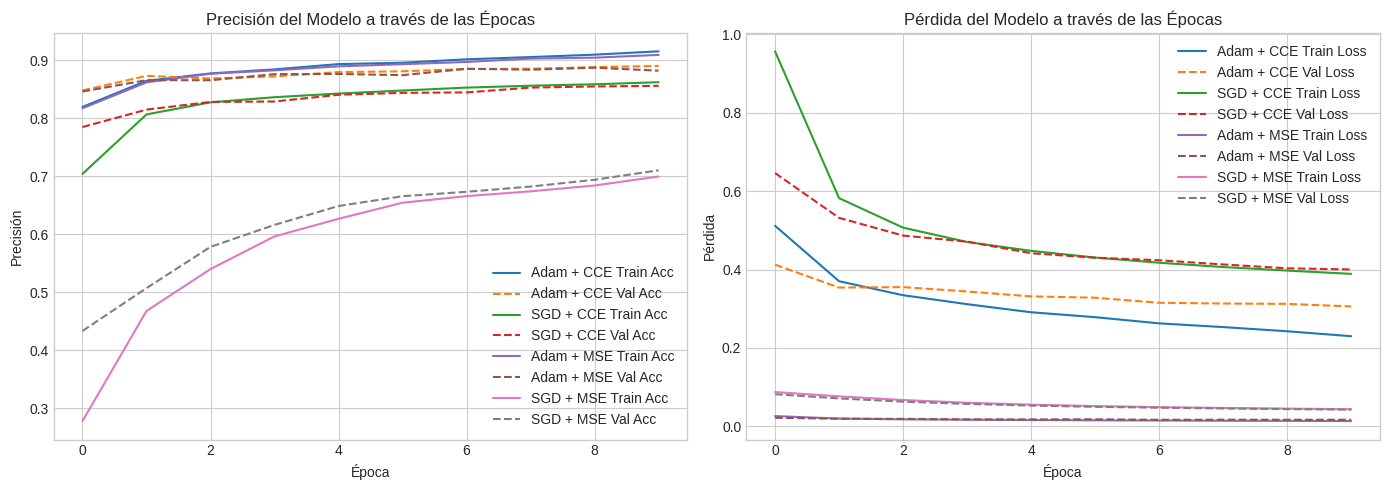


--- Evaluación Final sobre el Conjunto de Prueba ---
Adam + CCE -> Pérdida: 0.3351, Precisión: 0.8858
SGD + CCE -> Pérdida: 0.4288, Precisión: 0.8473
Adam + MSE -> Pérdida: 0.0179, Precisión: 0.8763
SGD + MSE -> Pérdida: 0.0436, Precisión: 0.7006

🏆 La mejor combinación fue: Adam + CCE con una precisión de 0.8858


In [6]:
# --- Función para visualizar los resultados ---
def plot_histories(histories, labels):
    """
    Función para graficar la pérdida y precisión de múltiples entrenamientos.
    """
    plt.figure(figsize=(14, 5))

    # Gráfico de Precisión (Accuracy)
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'{labels[i]} Train Acc')
        plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{labels[i]} Val Acc')
    plt.title('Precisión del Modelo a través de las Épocas')
    plt.ylabel('Precisión')
    plt.xlabel('Época')
    plt.legend()
    plt.grid(True)

    # Gráfico de Pérdida (Loss)
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'{labels[i]} Train Loss')
        plt.plot(history.history['val_loss'], linestyle='--', label=f'{labels[i]} Val Loss')
    plt.title('Pérdida del Modelo a través de las Épocas')
    plt.ylabel('Pérdida')
    plt.xlabel('Época')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# --- Visualización de los 4 experimentos ---
all_histories = [history_1, history_2, history_3, history_4]
all_labels = ['Adam + CCE', 'SGD + CCE', 'Adam + MSE', 'SGD + MSE']
plot_histories(all_histories, all_labels)


# --- Evaluación final sobre el conjunto de prueba ---
print("\n--- Evaluación Final sobre el Conjunto de Prueba ---")
results = {}

# Experimento 1
loss1, acc1 = model_1.evaluate(x_test, y_test, verbose=0)
results['Adam + CCE'] = acc1
print(f"Adam + CCE -> Pérdida: {loss1:.4f}, Precisión: {acc1:.4f}")

# Experimento 2
loss2, acc2 = model_2.evaluate(x_test, y_test, verbose=0)
results['SGD + CCE'] = acc2
print(f"SGD + CCE -> Pérdida: {loss2:.4f}, Precisión: {acc2:.4f}")

# Experimento 3
loss3, acc3 = model_3.evaluate(x_test, y_test, verbose=0)
results['Adam + MSE'] = acc3
print(f"Adam + MSE -> Pérdida: {loss3:.4f}, Precisión: {acc3:.4f}")

# Experimento 4
loss4, acc4 = model_4.evaluate(x_test, y_test, verbose=0)
results['SGD + MSE'] = acc4
print(f"SGD + MSE -> Pérdida: {loss4:.4f}, Precisión: {acc4:.4f}")

# Encontrar la mejor combinación
best_combination = max(results, key=results.get)
print(f"\n🏆 La mejor combinación fue: {best_combination} con una precisión de {results[best_combination]:.4f}")

### **5. Reflexión**

Análisis de los resultados obtenidos tras experimentar con diferentes optimizadores y funciones de pérdida en un problema de clasificación de imágenes.

---

### 1. ¿Qué combinación funcionó mejor y por qué?

La combinación ganadora fue, sin duda, **Adam + Categorical Crossentropy (CCE)**, que alcanzó una precisión final en el conjunto de prueba del **88.58%**.

#### **¿Por qué fue la mejor?**

* **Rendimiento Superior**: Simplemente, obtuvo la puntuación de precisión más alta en los datos de prueba (`0.8858`), que es la métrica definitiva para comparar los modelos.

* **Convergencia Rápida y Eficiente**: Si observamos el gráfico de "Precisión", la línea azul (`Adam + CCE Train Acc`) y la naranja (`Adam + CCE Val Acc`) suben drásticamente desde la primera época, alcanzando más del 84% de precisión de validación de inmediato. El optimizador **Adam** es adaptativo, lo que significa que ajusta la tasa de aprendizaje eficientemente, permitiendo al modelo aprender muy rápido. En contraste, **SGD** (línea verde) tuvo un comienzo mucho más lento y necesitó varias épocas para alcanzar un rendimiento similar.

* **La Herramienta Correcta para el Trabajo**: Aunque `Adam + MSE` tuvo un rendimiento sorprendentemente bueno (87.63%), **CCE** es la función de pérdida teóricamente correcta para este problema. CCE está diseñada para medir el error en problemas de clasificación multiclase con salida `softmax`. Esto generalmente conduce a un entrenamiento más estable y a una mejor generalización, lo que se refleja en esa pequeña pero crucial ventaja en la precisión final.

---

### 2. ¿Qué efectos tuviste al cambiar los componentes?

Aquí podemos ver claramente el impacto de cada decisión.

#### **Efecto del Optimizador (Adam vs. SGD)**

El impacto es enorme. En ambos casos (con CCE y con MSE), **Adam superó ampliamente a SGD** en las 10 épocas.

* `Adam + CCE` (**88.6%**) vs. `SGD + CCE` (**84.7%**): Adam no solo fue más preciso, sino muchísimo más rápido en aprender. En la primera época, Adam ya tenía una `val_accuracy` de `0.8482`, un nivel que a SGD le costó 6 épocas alcanzar.
* `Adam + MSE` (**87.6%**) vs. `SGD + MSE` (**70.1%**): La diferencia aquí es abismal. Demuestra que Adam es lo suficientemente robusto como para obtener un buen resultado incluso con una función de pérdida no ideal (MSE), mientras que SGD sufre enormemente con esa combinación.

#### **Efecto de la Función de Pérdida (CCE vs. MSE)**

Los resultados demuestran que **CCE es superior para la clasificación**.

* Con el optimizador Adam, la diferencia de precisión final no fue tan grande (88.6% vs 87.6%), pero con SGD, la diferencia fue masiva (84.7% vs 70.1%).
* **Conclusión clave**: Un buen optimizador como **Adam** puede a veces compensar una elección de función de pérdida subóptima. Sin embargo, para obtener el mejor rendimiento y, especialmente si usas un optimizador más simple, elegir la función de pérdida correcta (**CCE** en este caso) es fundamental.

> **Nota Importante**: No te dejes engañar por los valores de pérdida del gráfico. La pérdida de `MSE` (ej. `0.017`) y `CCE` (ej. `0.33`) no son comparables directamente, ya que miden el error en escalas completamente diferentes. **Debes guiarte por la métrica de precisión (`accuracy`)**.

#### **Efecto de las Funciones de Activación (ReLU y Tanh)**

* Dado que todos los modelos usaron la misma arquitectura (`ReLU` en la primera capa oculta y `Tanh` en la segunda), no podemos comparar su efecto directamente con estos experimentos.
* Sin embargo, podemos afirmar que esta combinación fue efectiva, ya que los dos mejores modelos superaron el 87% de precisión. Demuestra que la combinación de la eficiencia de ReLU y las propiedades de normalización de Tanh pueden funcionar bien juntas.

---

### 3. ¿Qué harías diferente si tuvieras más datos o más tiempo de entrenamiento?

Basándonos en los gráficos, podemos tomar decisiones muy informadas para los siguientes pasos.

#### **Con más tiempo de entrenamiento (más épocas)**

* **Observación clave**: La línea naranja (`Adam + CCE Val Acc`) incluso en la décima época, sigue subiendo ligeramente. La pérdida de validación (`val_loss`, línea naranja discontinua) también sigue bajando. Esto es una señal clara de que **el modelo aún no ha alcanzado su máximo potencial** y podría mejorar si lo entrenaras durante más épocas (ej. 20 o 30).
* **Riesgo de sobreajuste**: Se comienza a abrir una brecha entre la precisión de entrenamiento (línea azul) y la de validación (línea naranja). El modelo está empezando a aprender "demasiado bien" los datos de entrenamiento.

##### **Acciones a tomar:**

1.  **Entrenar más épocas**: Dejar que el modelo siga aprendiendo para que la curva de validación continúe ascendiendo.
2.  **Implementar `EarlyStopping`**: Esta es una técnica esencial. Monitorea la pérdida de validación (`val_loss`) y detiene el entrenamiento automáticamente cuando deja de mejorar, evitando así el sobreajuste y ahorrando tiempo de cómputo.
3.  **Añadir `Dropout`**: Incluir capas de `Dropout` en el modelo es una de las mejores formas de regularización. "Apaga" neuronas al azar durante el entrenamiento, forzando al modelo a aprender características más robustas y reduciendo la brecha entre las curvas de entrenamiento y validación.

#### **Con más datos**

¡Más datos es el mejor remedio contra el sobreajuste! Permitiría al modelo generalizar mucho mejor.

* **Aumentar la complejidad del modelo**: Con un dataset más grande, podríamos construir una red neuronal más compleja sin tanto miedo a que memorice los datos. Podríamos:
    * **Hacerla más profunda**: Añadir más capas `Dense`.
    * **Hacerla más ancha**: Aumentar el número de neuronas en las capas existentes (ej. de 128 a 256).
* **Usar una arquitectura más potente**: Con más datos, sería el momento ideal para pasar de una red neuronal densa a una **Red Neuronal Convolucional (CNN)**. Las CNNs están diseñadas específicamente para procesar imágenes y casi con toda seguridad te darían una precisión final superior al 90%.